In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["Hello my name is kishu. hello my name is Kishu.",
        "hello my name is Kishu.",
        "Hello I am  Sakshi"]
# coun_vect = CountVectorizer(lowercase = False, stop_words = ["i"],max_df=0.75)
# coun_vect = CountVectorizer(lowercase = False, stop_words = ["i"],min_df=2)
coun_vect = CountVectorizer(lowercase = False, stop_words = ["i"],min_df=2,max_features=4)
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print(df)

   Hello  is  my  name
0      1   2   2     2
1      0   1   1     1
2      1   0   0     0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, accuracy_score

**Read and Load the Dataset**

In [ ]:
columns = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv("/content/drive/MyDrive/CE_Sem_6/ML/Lab6/training.1600000.processed.noemoticon.csv", encoding="latin",
names=columns)

# df.sample(5)
df.describe()
# df.columns

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
# replacing the '4' with '1' as positive sentiment
df["sentiment"] = df["sentiment"].replace(4,1)
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Data Visualization of Target Variables**

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

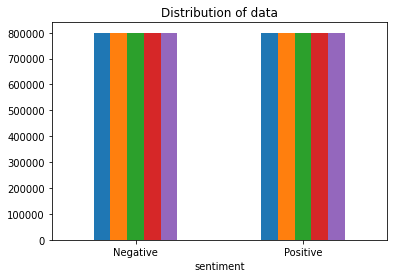

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

**Data Visualization of Target Variables**

<AxesSubplot:xlabel='sentiment', ylabel='count'>

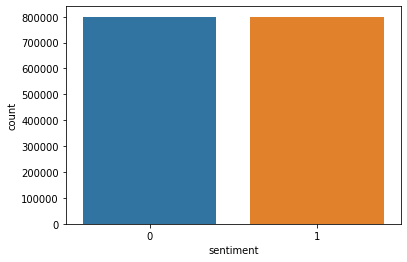

In [ ]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

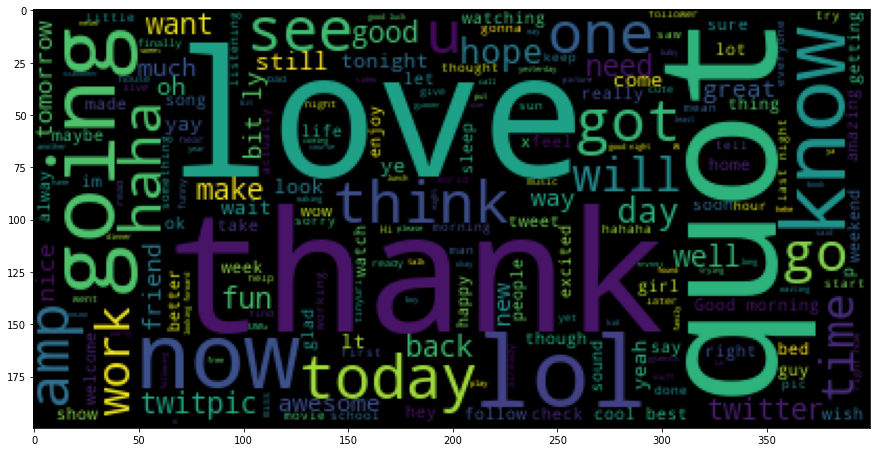

In [ ]:
#creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

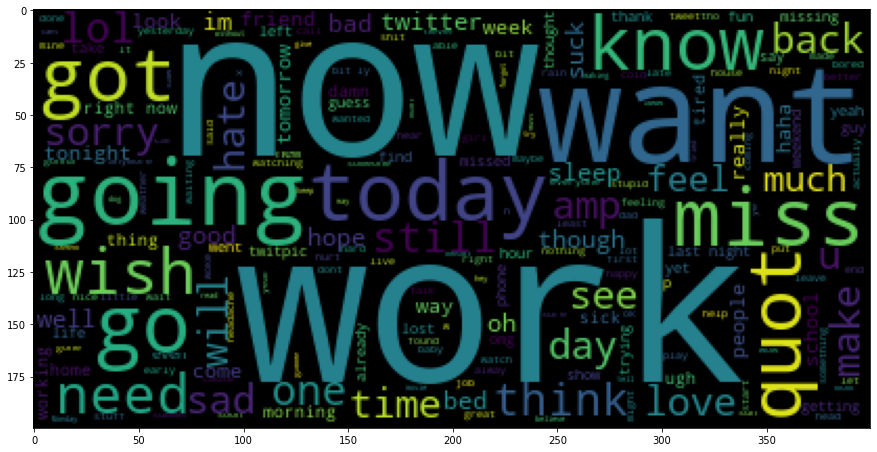

In [ ]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

**Data Preprocessing**

In [ ]:
#removing stopwords,urls from the dataset
def clearing_URLs(df):
  return re.sub(r'https?:\/\/.*[\r\n]*', '', df)
df['text'] = df['text'].apply(lambda x: clearing_URLs(x))

# def clearing_punctuation(df):
#   return re.sub(string.punctuation, '', df)
# df['text'] = df['text'].apply(lambda x: clearing_punctuation(x))

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

count_vect = CountVectorizer(lowercase = False, stop_words = stopwordlist ,max_df=1000, max_features=200)
count_matrix = count_vect.fit_transform(df['text'])
count_array = count_matrix.toarray()
data = pd.DataFrame(data=count_array, columns= count_vect.get_feature_names())
print(data)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


         000  09  21  2morrow  4th  ARE  Actually  Adam  Air  Australia  ...  \
0          0   0   0        0    0    0         0     0    0          0  ...   
1          0   0   0        0    0    0         0     0    0          0  ...   
2          0   0   0        0    0    0         0     0    0          0  ...   
3          0   0   0        0    0    0         0     0    0          0  ...   
4          0   0   0        0    0    0         0     0    0          0  ...   
...      ...  ..  ..      ...  ...  ...       ...   ...  ...        ...  ...   
1599995    0   0   0        0    0    0         0     0    0          0  ...   
1599996    0   0   0        0    0    0         0     0    0          0  ...   
1599997    0   0   0        0    0    0         0     0    0          0  ...   
1599998    0   0   0        0    0    0         0     0    0          0  ...   
1599999    0   0   0        0    0    0         0     0    0          0  ...   

         uh  uni  view  wash  wednesday

In [ ]:
# splitting the features into train and test
X = data
Y = df['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30,random_state = 0)
X_train
Y_train

1517114    1
1113746    1
695250     0
296978     0
1244525    1
          ..
152315     0
963395     1
117952     0
1484405    1
305711     0
Name: sentiment, Length: 1120000, dtype: int64

In [ ]:
# Multinomial Naive Bayes Classifier

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
# predicting the labels
output_pred = MNB.predict(X_test)
print("output_pred: ",output_pred)

output_pred:  [0 0 1 ... 0 0 1]


In [ ]:
# model accuracy
print("Confusion Matrix: ",confusion_matrix(Y_test, output_pred))
print("Accuracy: ", accuracy_score(Y_test, output_pred))
print("Precision: ", precision_score(Y_test, output_pred))
print("recall: ", recall_score(Y_test, output_pred))

In [ ]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# predicting the labels
output_pred = clf.predict(X_test)
print("output_pred: ",output_pred)

output_pred:  [1 1 0 ... 1 1 1]


In [ ]:
# model accuracy
print("Confusion Matrix: ",confusion_matrix(Y_test, output_pred))
print("Accuracy: ", accuracy_score(Y_test, output_pred))
print("Precision: ", precision_score(Y_test, output_pred))
print("recall: ", recall_score(Y_test, output_pred))